In [2]:
import numpy as np
import pandas as pd
import cv2
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import filters
from skimage import util
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, estimate_bandwidth
import warnings
warnings.filterwarnings("ignore")

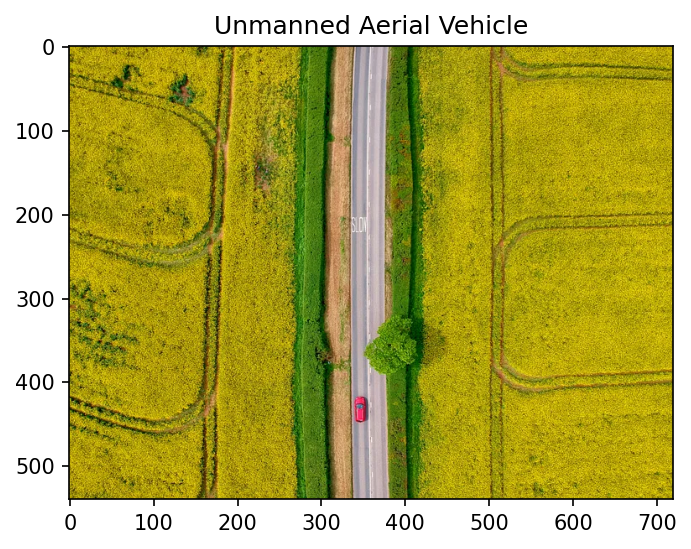

In [4]:
imageName = 'UAV_image.jpg'
image = plt.imread(imageName)
plt.figure(dpi=150)
plt.title('Unmanned Aerial Vehicle')
plt.imshow(image)

In [7]:
index = pd.MultiIndex.from_product(
    (*map(range, image.shape[:2]), ('r', 'g', 'b')),
    names=('row', 'col', None))
df_1 = pd.Series(image.flatten(), index=index)
df_1 = df_1.unstack()
df_1 = df_1.reset_index().reindex(columns=['col','row',   'r','g','b'])
df_1.head(10)

,col,row,r,g,b
0,0,0,170,150,0
1,1,0,172,152,0
2,2,0,161,142,0
3,3,0,196,178,11
4,4,0,180,162,0
5,5,0,196,177,13
6,6,0,165,141,0
7,7,0,166,142,0
8,8,0,186,162,13
9,9,0,130,108,0


In [9]:
df_2 = df_1[['r', 'g', 'b']]
df_2.head(10)

,r,g,b
0,170,150,0
1,172,152,0
2,161,142,0
3,196,178,11
4,180,162,0
5,196,177,13
6,165,141,0
7,166,142,0
8,186,162,13
9,130,108,0


In [10]:
nd_1 = df_1.values.astype(np.float32)
nd_1[:, 0] = nd_1[:, 0] / (nd_1[:, 0].max() + 1)
nd_1[:, 1] = nd_1[:, 1] / (nd_1[:, 1].max() + 1)
nd_1[:, 2:] = nd_1[:, 2:] / 255
nd_2 = df_2.astype(np.float64) / 255

In [11]:
nd_1 = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_1)
nd_2 = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_2)

In [ ]:
'''
There is a known python class which calculate gaussian kernel depending on data. 
Class is called as estimate_bandwidth.
the most popular one is the Gaussian kernel. Gaussian kernel has a bandwith which is needed 
to start mean-shift algorithm. It is also called window'''
bandwidth_1 = estimate_bandwidth(nd_1, quantile=.04, n_jobs=-1)
bandwidth_2 = estimate_bandwidth(nd_2, quantile=.04, n_jobs=-1);

In [ ]:
ms_1 = MeanShift(bandwidth = bandwidth_1 , n_jobs=-1, bin_seeding=True, cluster_all=True).fit(nd_1)
ms_2 = MeanShift(bandwidth = bandwidth_2 , n_jobs=-1, bin_seeding=True, cluster_all=True).fit(nd_2)

In [ ]:
plt.figure(1)
plt.clf()
plt.axis(‘off’)
plt.title(‘Original image’, loc=’center’)
plt.imshow(image)
plt.figure(2)
plt.clf()
plt.axis(‘off’)
plt.title(‘Pixels with their location image ({} colors, Mean-Shift)’.format(len(ms_1.cluster_centers_)), loc=’center’)
plt.imshow(recreate_image(ms_1.cluster_centers_[:, 2:], ms_1.labels_, width, height));
plt.figure(3)
plt.clf()
plt.axis(‘off’)
plt.title(‘Pixels without their location ({} colors, Mean-Shift)’.format(len(ms_2.cluster_centers_)), loc=’center’)
plt.imshow(recreate_image(ms_2.cluster_centers_, ms_2.labels_, width, height));